In [51]:
import time
import graphviz
import pandas as pd

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

start_time = time.time()

In [52]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics
import numpy as np

In [53]:
df = pd.read_csv(open("C:\\Users\\acer\\OneDrive\\Desktop\\rock.csv"))

In [54]:
predictors = df.values[:, 0:11]
targets = df.values[:,11]

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size= 0.33)

In [55]:
print(pred_train.shape)
print(pred_test.shape)
print(tar_train.shape)
print(tar_test.shape)

(1340, 11)
(660, 11)
(1340,)
(660,)


In [56]:
features = list(df.columns[:9])

In [57]:
classifier = DecisionTreeClassifier(criterion = "gini", random_state = 21, splitter='best')
classifier = classifier.fit(pred_train,tar_train)
pred = classifier.predict(pred_test)

In [58]:
print(sklearn.metrics.confusion_matrix(tar_test, pred))

#classification accuracy
print("accuracy of training dataset is{:.2f}".format(classifier.score(pred_train,tar_train)))
print("accuracy of test dataset is {:.2f}".format(classifier.score(pred_test,tar_test)))
#print(accuracy_score(tar_test, predictions, normalize = True))

#error rate
print("Error rate is",1- accuracy_score(tar_test, pred, normalize = True))

#sensitivity
print("sensitivity is", sklearn.metrics.recall_score(tar_test, pred,labels=None, average =  'micro', sample_weight=None))
#specificity
print("specificity is", 1 - sklearn.metrics.recall_score(tar_test, pred,labels=None, average =  'micro', sample_weight=None))

#precision
#print("precision is",sklearn.metrics.precision_score(tar_test, predictions, labels=None, pos_label=1, average =  'micro' ,sample_weight=None))

#Recall


#time to execute
#print("time elapsed: {:.2f}s".format(time.time() - start_time))
results =[]
results.append(accuracy_score(tar_test, pred, normalize = True))
classification = 1 - accuracy_score(tar_test, pred, normalize = True)
results.append(classification)
sensi = sklearn.metrics.recall_score(tar_test, pred, labels=None, average =  'micro', sample_weight=None)
results.append(sensi)

specificity = 1 - sensi
results.append(specificity)

list2 = ["accuracy" , "classifiacation" , "sensi" , "speci"]

[[461  57  17   1   1]
 [ 60  24   8   0   1]
 [ 19   3   1   0   0]
 [  6   0   0   0   0]
 [  1   0   0   0   0]]
accuracy of training dataset is1.00
accuracy of test dataset is 0.74
Error rate is 0.26363636363636367
sensitivity is 0.7363636363636363
specificity is 0.26363636363636367


<BarContainer object of 4 artists>

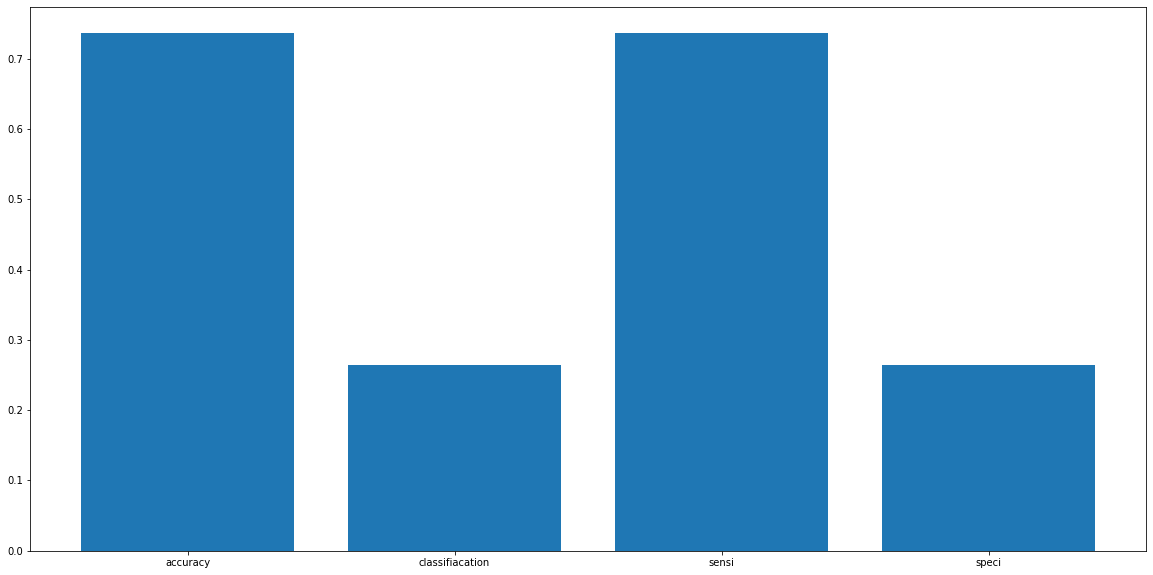

In [59]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (20, 10))
plt.bar(list2 , results )